# Setup

### Imports

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### Activation Functions

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

def heaviside(z):
    return (z >= 0).astype(z.dtype)

# Image Classifier

### Importing Dataset and Splitting Into Test and Train

In [24]:
X_train_full = np.load('./datasets/employees/smiley_X.npy') 
X_test = X_train_full
y_train_full = np.load('./datasets/employees/smiley_y.npy').astype(int)
y_test = y_train_full

X_valid, X_train = X_train_full[:72], X_train_full[72:]
y_valid, y_train = y_train_full[:72], y_train_full[72:]
X_test = X_test

class_names = ["Happy", "Sad"]

Saving figure fashion_mnist_plot


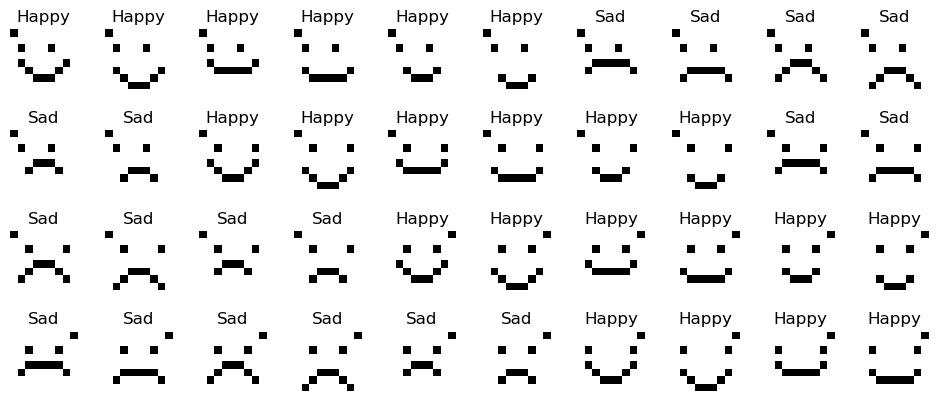

In [5]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

### Making the Models

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

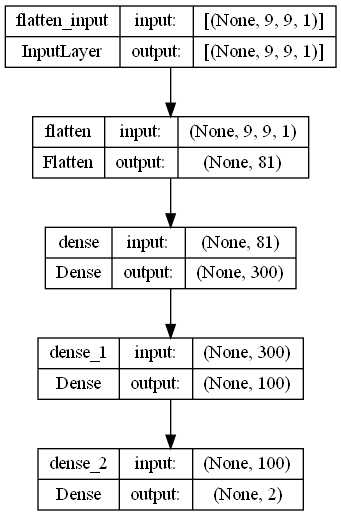

In [7]:
keras.utils.plot_model(model, "mlp_model.png", show_shapes=True)

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [9]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
3/3 [==============================] - 3s 265ms/step - loss: 0.6998 - accuracy: 0.4306 - val_loss: 0.6977 - val_accuracy: 0.5278
Epoch 2/30
3/3 [==============================] - 0s 22ms/step - loss: 0.6825 - accuracy: 0.5000 - val_loss: 0.6806 - val_accuracy: 0.6250
Epoch 3/30
3/3 [==============================] - 0s 52ms/step - loss: 0.6632 - accuracy: 0.6528 - val_loss: 0.6655 - val_accuracy: 0.6389
Epoch 4/30
3/3 [==============================] - 0s 22ms/step - loss: 0.6460 - accuracy: 0.7222 - val_loss: 0.6520 - val_accuracy: 0.6667
Epoch 5/30
3/3 [==============================] - 0s 33ms/step - loss: 0.6316 - accuracy: 0.7500 - val_loss: 0.6384 - val_accuracy: 0.6667
Epoch 6/30
3/3 [==============================] - 0s 23ms/step - loss: 0.6155 - accuracy: 0.7778 - val_loss: 0.6259 - val_accuracy: 0.6667
Epoch 7/30
3/3 [==============================] - 0s 23ms/step - loss: 0.6016 - accuracy: 0.7917 - val_loss: 0.6133 - val_accuracy: 0.6806
Epoch 8/30
3/3 [==========

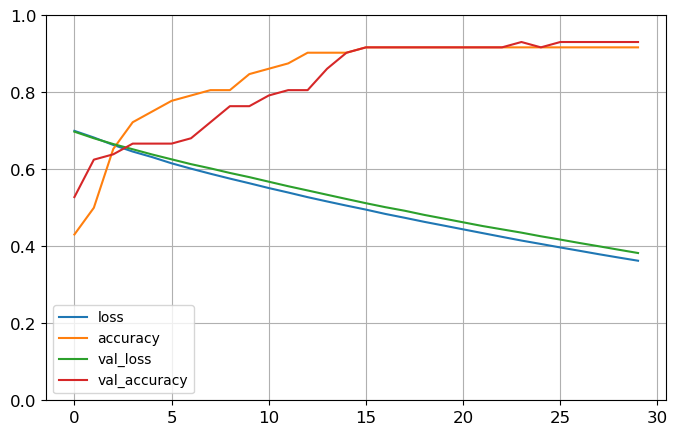

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.3691 - accuracy: 0.9236


[0.36913713812828064, 0.9236111044883728]

# Hyperparameter Experimentation

In [12]:
Models = [
    (keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")])),

    (keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(500, activation="sigmoid"),
    keras.layers.Dense(50, activation="sigmoid"),
    keras.layers.Dense(2, activation="softmax")])),

    (keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="sigmoid"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")])),
]

In [13]:
history = []
for model in Models:
    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    history.append(model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid)))

Epoch 1/100
3/3 [==============================] - 1s 180ms/step - loss: 0.6810 - accuracy: 0.5556 - val_loss: 0.6714 - val_accuracy: 0.6667
Epoch 2/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6688 - accuracy: 0.6111 - val_loss: 0.6616 - val_accuracy: 0.7083
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 0.6580 - accuracy: 0.6528 - val_loss: 0.6515 - val_accuracy: 0.7639
Epoch 4/100
3/3 [==============================] - 0s 22ms/step - loss: 0.6474 - accuracy: 0.7361 - val_loss: 0.6407 - val_accuracy: 0.8333
Epoch 5/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6355 - accuracy: 0.8472 - val_loss: 0.6317 - val_accuracy: 0.8750
Epoch 6/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6258 - accuracy: 0.8611 - val_loss: 0.6233 - val_accuracy: 0.8889
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6165 - accuracy: 0.8889 - val_loss: 0.6140 - val_accuracy: 0.9028
Epoch 8/100
3/3 [==

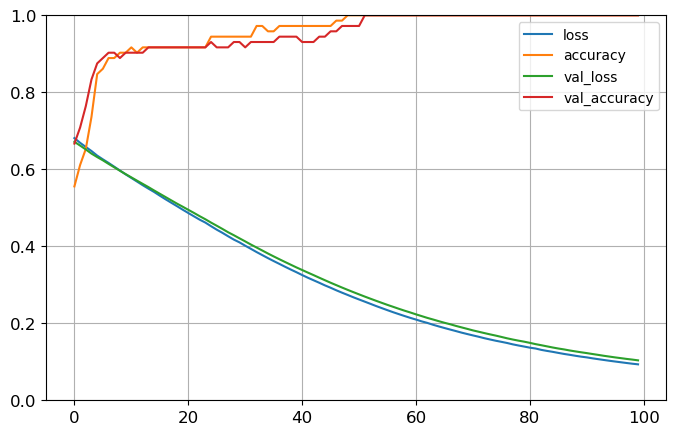

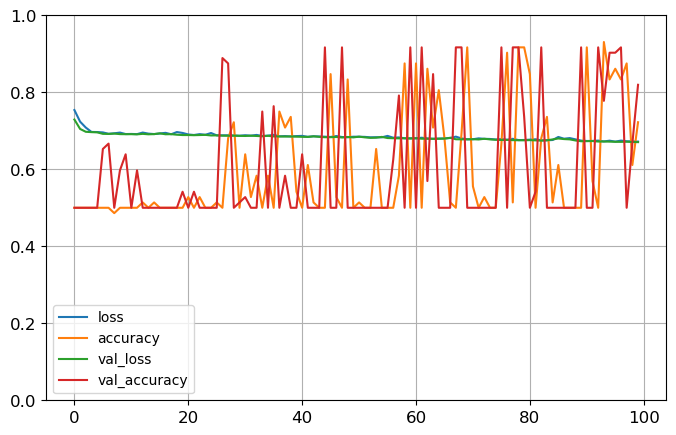

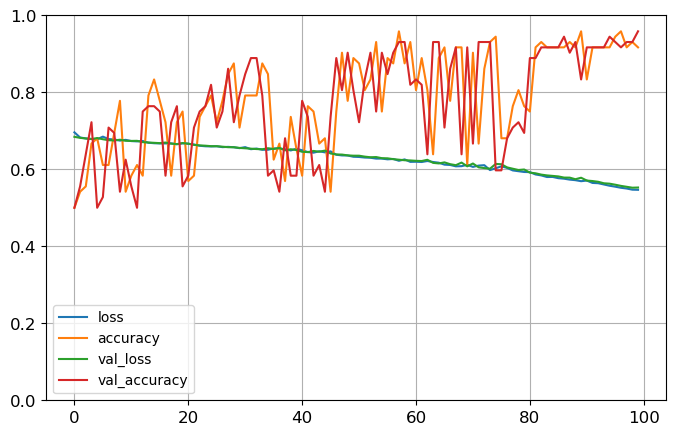

In [14]:
for hist in history:
    pd.DataFrame(hist.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

# Experimenting with 3 different classifiers using training and testing sets

### 50/50 Train Test Split

Epoch 1/100
2/2 [==============================] - 1s 314ms/step - loss: 0.6608 - accuracy: 0.6667 - val_loss: 0.6573 - val_accuracy: 0.6667
Epoch 2/100
2/2 [==============================] - 0s 41ms/step - loss: 0.6510 - accuracy: 0.6667 - val_loss: 0.6510 - val_accuracy: 0.6667
Epoch 3/100
2/2 [==============================] - 0s 49ms/step - loss: 0.6427 - accuracy: 0.6667 - val_loss: 0.6446 - val_accuracy: 0.6667
Epoch 4/100
2/2 [==============================] - 0s 41ms/step - loss: 0.6341 - accuracy: 0.6667 - val_loss: 0.6358 - val_accuracy: 0.7222
Epoch 5/100
2/2 [==============================] - 0s 45ms/step - loss: 0.6245 - accuracy: 0.7222 - val_loss: 0.6325 - val_accuracy: 0.6667
Epoch 6/100
2/2 [==============================] - 0s 46ms/step - loss: 0.6194 - accuracy: 0.6389 - val_loss: 0.6233 - val_accuracy: 0.7222
Epoch 7/100
2/2 [==============================] - 0s 42ms/step - loss: 0.6083 - accuracy: 0.6944 - val_loss: 0.6160 - val_accuracy: 0.7222
Epoch 8/100
2/2 [==

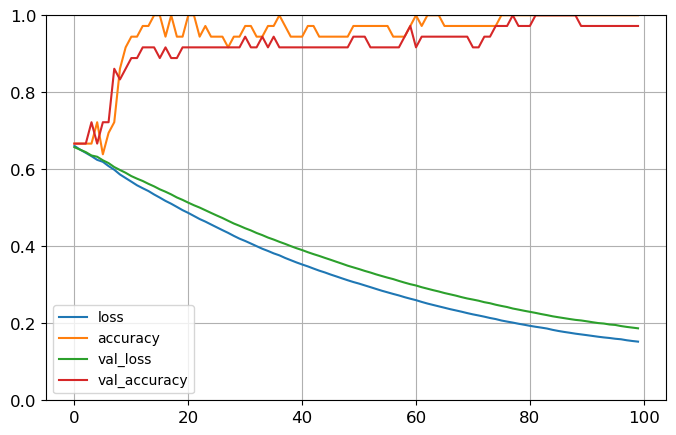

3/3 [==============================] - 0s 3ms/step - loss: 0.1925 - accuracy: 0.9444


[0.1925223022699356, 0.9444444179534912]

In [15]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

X_test1, X_train1 = X_train_full[:72], X_train_full[72:]
y_test1, y_train1 = y_train_full[:72], y_train_full[72:]
X_valid1, X_train1 = X_train1[:36], X_train1[36:]
y_valid1, y_train1 = y_train1[:36], y_train1[36:]

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = (model.fit(X_train1, y_train1, epochs=100, validation_data=(X_valid1, y_valid1)))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(X_test1, y_test1)

### 70/30 Train Test Split

Epoch 1/100
2/2 [==============================] - 1s 334ms/step - loss: 0.6834 - accuracy: 0.5686 - val_loss: 0.6889 - val_accuracy: 0.5400
Epoch 2/100
2/2 [==============================] - 0s 44ms/step - loss: 0.6743 - accuracy: 0.6667 - val_loss: 0.6817 - val_accuracy: 0.5800
Epoch 3/100
2/2 [==============================] - 0s 42ms/step - loss: 0.6659 - accuracy: 0.7647 - val_loss: 0.6747 - val_accuracy: 0.6600
Epoch 4/100
2/2 [==============================] - 0s 46ms/step - loss: 0.6579 - accuracy: 0.7843 - val_loss: 0.6678 - val_accuracy: 0.7000
Epoch 5/100
2/2 [==============================] - 0s 42ms/step - loss: 0.6492 - accuracy: 0.8235 - val_loss: 0.6609 - val_accuracy: 0.7400
Epoch 6/100
2/2 [==============================] - 0s 45ms/step - loss: 0.6413 - accuracy: 0.8431 - val_loss: 0.6543 - val_accuracy: 0.7800
Epoch 7/100
2/2 [==============================] - 0s 53ms/step - loss: 0.6335 - accuracy: 0.8824 - val_loss: 0.6476 - val_accuracy: 0.8400
Epoch 8/100
2/2 [==

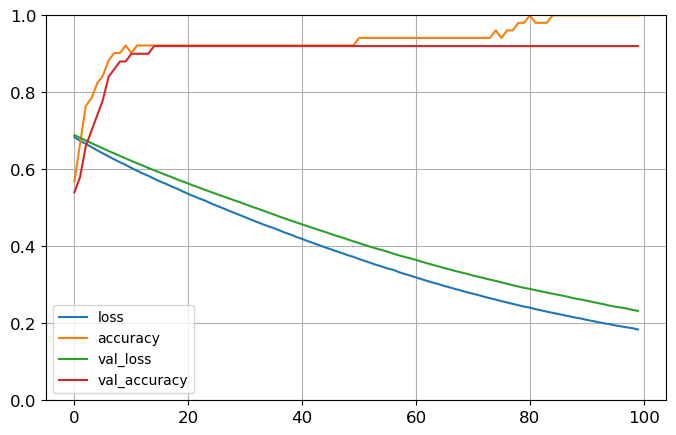

2/2 [==============================] - 0s 5ms/step - loss: 0.2252 - accuracy: 0.9535


[0.22515755891799927, 0.9534883499145508]

In [16]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

X_test2, X_train2 = X_train_full[:43], X_train_full[43:]
y_test2, y_train2 = y_train_full[:43], y_train_full[43:]
X_valid2, X_train2 = X_train2[:50], X_train2[50:]
y_valid2, y_train2 = y_train2[:50], y_train2[50:]

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = (model.fit(X_train2, y_train2, epochs=100, validation_data=(X_valid2, y_valid2)))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(X_test2, y_test2)

### 40/60 Train Test Split

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.1071 - accuracy: 0.5172 - val_loss: 1.1333 - val_accuracy: 0.3793
Epoch 2/100
1/1 [==============================] - 0s 49ms/step - loss: 1.0886 - accuracy: 0.5862 - val_loss: 1.1171 - val_accuracy: 0.3793
Epoch 3/100
1/1 [==============================] - 0s 47ms/step - loss: 1.0708 - accuracy: 0.5862 - val_loss: 1.1016 - val_accuracy: 0.4138
Epoch 4/100
1/1 [==============================] - 0s 47ms/step - loss: 1.0535 - accuracy: 0.5862 - val_loss: 1.0866 - val_accuracy: 0.4138
Epoch 5/100
1/1 [==============================] - 0s 48ms/step - loss: 1.0369 - accuracy: 0.5862 - val_loss: 1.0722 - val_accuracy: 0.4483
Epoch 6/100
1/1 [==============================] - 0s 47ms/step - loss: 1.0208 - accuracy: 0.5862 - val_loss: 1.0583 - val_accuracy: 0.4483
Epoch 7/100
1/1 [==============================] - 0s 49ms/step - loss: 1.0050 - accuracy: 0.5862 - val_loss: 1.0448 - val_accuracy: 0.4483
Epoch 8/100
1/1 [=====

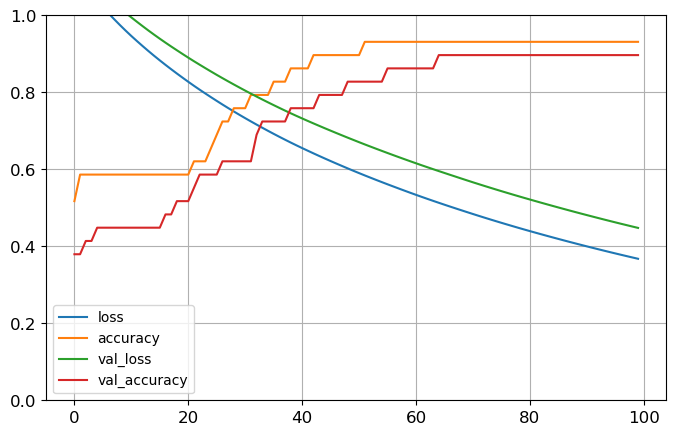

3/3 [==============================] - 0s 3ms/step - loss: 0.4426 - accuracy: 0.9419


[0.4426282048225403, 0.9418604373931885]

In [17]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
])

X_test3, X_train3 = X_train_full[:86], X_train_full[86:]
y_test3, y_train3 = y_train_full[:86], y_train_full[86:]
X_valid3, X_train3 = X_train3[:29], X_train3[29:]
y_valid3, y_train3 = y_train3[:29], y_train3[29:]

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = (model.fit(X_train3, y_train3, epochs=100, validation_data=(X_valid3, y_valid3)))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(X_test3, y_test3)

# Convolution Neural Networks

In [31]:
X_train_full = np.load('./datasets/employees/smiley_X.npy') 
X_test = X_train_full
y_train_full = np.load('./datasets/employees/smiley_y.npy').astype(int)
y_test = y_train_full

X_valid, X_train = X_train_full[:72], X_train_full[72:]
y_valid, y_train = y_train_full[:72], y_train_full[72:]
X_test = X_test

class_names = ["Happy", "Sad"]

### Building an ANN

Epoch 1/100
3/3 [==============================] - 1s 147ms/step - loss: 2.4813 - accuracy: 0.0000e+00 - val_loss: 2.4205 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 24ms/step - loss: 2.3780 - accuracy: 0.0000e+00 - val_loss: 2.3300 - val_accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 32ms/step - loss: 2.2810 - accuracy: 0.0139 - val_loss: 2.2413 - val_accuracy: 0.0278
Epoch 4/100
3/3 [==============================] - 0s 23ms/step - loss: 2.1859 - accuracy: 0.1111 - val_loss: 2.1560 - val_accuracy: 0.1806
Epoch 5/100
3/3 [==============================] - 0s 24ms/step - loss: 2.0955 - accuracy: 0.2500 - val_loss: 2.0732 - val_accuracy: 0.2778
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 2.0070 - accuracy: 0.3333 - val_loss: 1.9939 - val_accuracy: 0.3750
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 1.9219 - accuracy: 0.4306 - val_loss: 1.9150 - val_accuracy: 0.4444
Epo

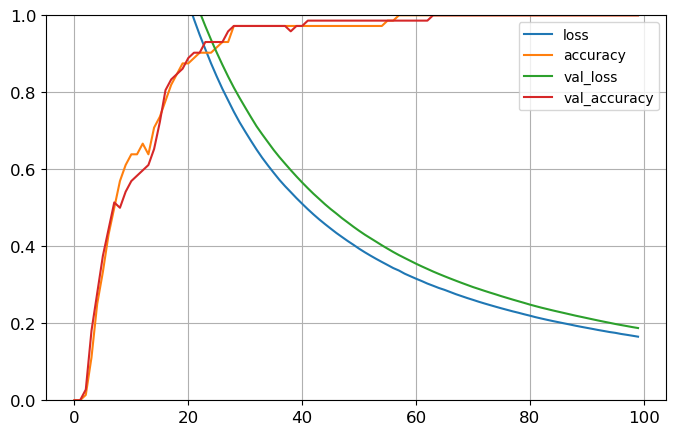

5/5 [==============================] - 0s 3ms/step - loss: 0.1755 - accuracy: 1.0000


[0.17551769316196442, 1.0]

In [28]:
keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[9, 9, 1]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = (model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid)))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(X_test, y_test)

In [37]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 1.0


### Building a CNN

In [48]:
keras.backend.clear_session()
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(9, 9, 1)),
  tf.keras.layers.MaxPooling2D(1, 1),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(1, 1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 7, 7, 64)          640       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 5, 5, 64)          36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1600)              0         
                                                                 
 dense_16 (Dense)            (None, 128)              

In [58]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
3/3 [==============================] - 0s 12ms/step - loss: 0.1512 - accuracy: 0.9167
Epoch 2/50
3/3 [==============================] - 0s 9ms/step - loss: 0.1181 - accuracy: 1.0000
Epoch 3/50
3/3 [==============================] - 0s 10ms/step - loss: 0.0587 - accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0372 - accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0231 - accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0136 - accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 1.0000
Epoch 8/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 9/50
3/3 [==============================] - 0s 12ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 10/50
3/3 [==============================] - 0s 12ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 11/50
3/3 [================

In [59]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 1.0


In [60]:
classifications = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [61]:
print(classifications[3])

[9.9999923e-01 6.7123125e-07 4.5899367e-18 1.8460022e-20 9.9735390e-19
 5.3187830e-23 2.8810470e-16 6.0103057e-22 7.0092109e-18 1.2434821e-19]


In [62]:
np.argmax(classifications[3])

0

In [63]:
np.max(classifications[3])

0.9999992

In [64]:
class_names[np.argmax(classifications[3])]

'Happy'

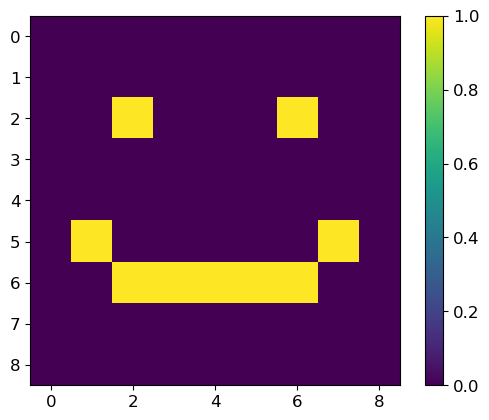

In [65]:
plt.imshow(X_test[3].reshape(9, 9))
plt.colorbar()
plt.grid(False)

1/1 [==============================] - 0s 33ms/step


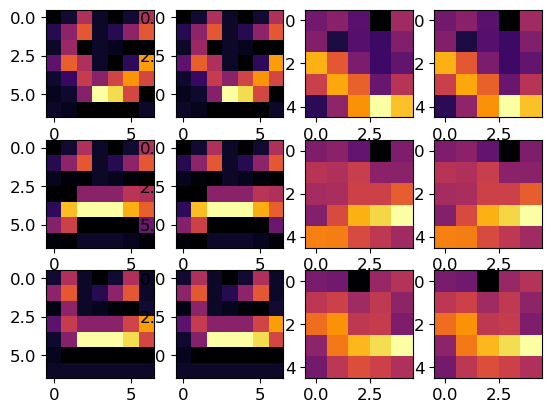

In [66]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(X_test[FIRST_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(X_test[SECOND_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(X_test[THIRD_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

### Testing Different CNN Architechtures

Epoch 1/50
3/3 [==============================] - 1s 169ms/step - loss: 2.1973 - accuracy: 0.4444 - val_loss: 1.6895 - val_accuracy: 0.9167
Epoch 2/50
3/3 [==============================] - 0s 31ms/step - loss: 1.4853 - accuracy: 0.9167 - val_loss: 0.7354 - val_accuracy: 0.9167
Epoch 3/50
3/3 [==============================] - 0s 31ms/step - loss: 0.5830 - accuracy: 0.9167 - val_loss: 0.2929 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 30ms/step - loss: 0.3060 - accuracy: 0.8889 - val_loss: 0.1808 - val_accuracy: 0.9167
Epoch 5/50
3/3 [==============================] - 0s 32ms/step - loss: 0.2029 - accuracy: 0.9167 - val_loss: 0.2526 - val_accuracy: 0.9167
Epoch 6/50
3/3 [==============================] - 0s 30ms/step - loss: 0.2200 - accuracy: 0.9167 - val_loss: 0.1041 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 35ms/step - loss: 0.1300 - accuracy: 0.9722 - val_loss: 0.0692 - val_accuracy: 1.0000
Epoch 8/50
3/3 [==========

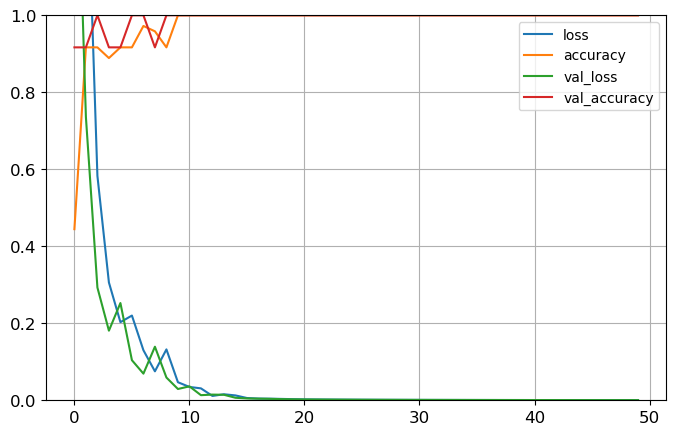


Test accuracy: 1.0


In [70]:
keras.backend.clear_session()
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(9, 9, 1)),
  tf.keras.layers.MaxPooling2D(1, 1),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(1, 1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = (model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid)))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)

Epoch 1/50
3/3 [==============================] - 1s 293ms/step - loss: 1.9054 - accuracy: 0.2500 - val_loss: 0.8032 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 0s 31ms/step - loss: 0.7816 - accuracy: 0.5000 - val_loss: 0.7385 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 0s 33ms/step - loss: 0.7748 - accuracy: 0.5000 - val_loss: 0.7554 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 0s 32ms/step - loss: 0.7435 - accuracy: 0.5000 - val_loss: 0.7155 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 0s 34ms/step - loss: 0.7182 - accuracy: 0.5000 - val_loss: 0.7263 - val_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 0s 33ms/step - loss: 0.7264 - accuracy: 0.5000 - val_loss: 0.7165 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 0s 38ms/step - loss: 0.7197 - accuracy: 0.5000 - val_loss: 0.7090 - val_accuracy: 0.5000
Epoch 8/50
3/3 [==========

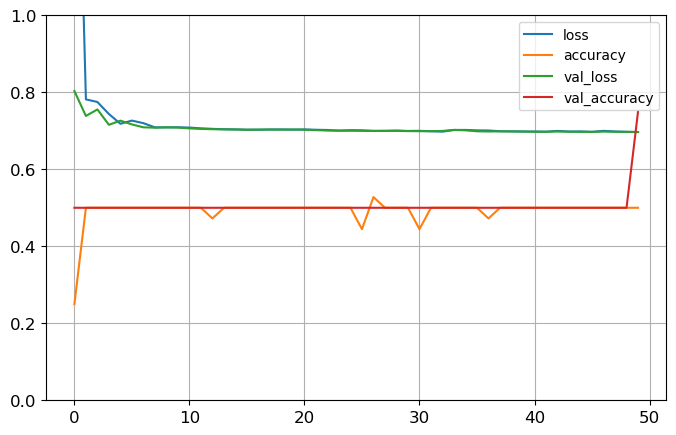


Test accuracy: 0.75


In [72]:
keras.backend.clear_session()
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='sigmoid', input_shape=(9, 9, 1)),
  tf.keras.layers.MaxPooling2D(1, 1),
  tf.keras.layers.Conv2D(64, (3,3), activation='sigmoid'),
  tf.keras.layers.MaxPooling2D(1, 1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = (model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid)))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)

Epoch 1/50
3/3 [==============================] - 1s 185ms/step - loss: 1.7749 - accuracy: 0.5000 - val_loss: 1.4368 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 0s 36ms/step - loss: 1.3567 - accuracy: 0.5000 - val_loss: 1.1087 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 0s 29ms/step - loss: 1.0570 - accuracy: 0.7083 - val_loss: 0.8923 - val_accuracy: 0.9028
Epoch 4/50
3/3 [==============================] - 0s 34ms/step - loss: 0.8571 - accuracy: 0.9028 - val_loss: 0.7602 - val_accuracy: 0.7500
Epoch 5/50
3/3 [==============================] - 0s 30ms/step - loss: 0.7430 - accuracy: 0.6111 - val_loss: 0.6833 - val_accuracy: 0.9167
Epoch 6/50
3/3 [==============================] - 0s 26ms/step - loss: 0.6800 - accuracy: 0.9167 - val_loss: 0.6399 - val_accuracy: 0.8194
Epoch 7/50
3/3 [==============================] - 0s 25ms/step - loss: 0.6321 - accuracy: 0.8333 - val_loss: 0.6043 - val_accuracy: 0.9167
Epoch 8/50
3/3 [==========

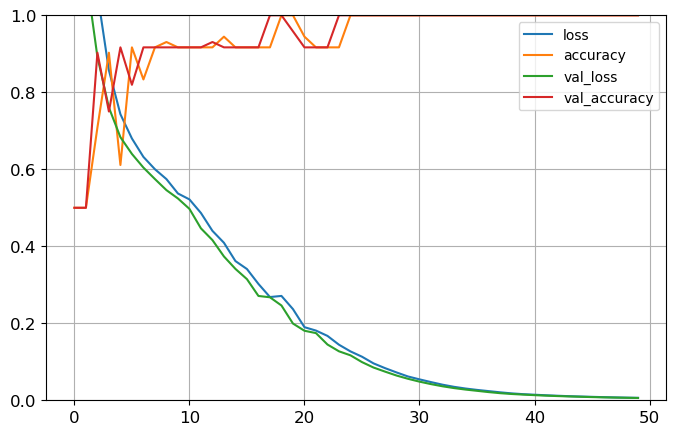


Test accuracy: 1.0


In [77]:
keras.backend.clear_session()
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(9, 9, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='sigmoid'),
  tf.keras.layers.MaxPooling2D(1, 1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = (model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid)))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)